## Лаботаторная работа № 2

## Морозова Маргарита, РИ-481223

In [3]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline

Строим сигнал, имеющий 2 разных пероида:

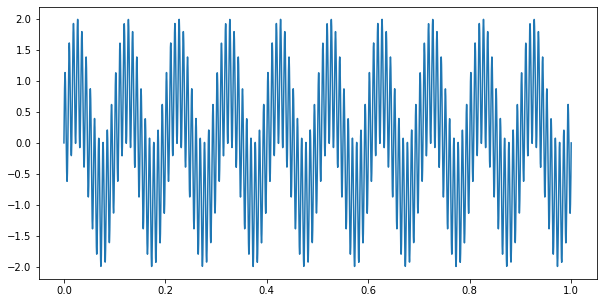

In [4]:
t = np.linspace(0, 1, 4096)
x1 = np.sin(2*np.pi*10*t) + np.sin(2*np.pi*120*t)
plt.figure(figsize = (10, 5))
plt.plot(t, x1)

Оценка сигнала с помощью метода Велша (Welch):

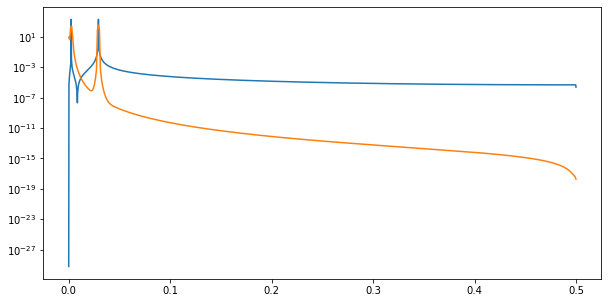

In [5]:
pd1, pdden1 = signal.periodogram(x1)
pdw1, pddenw1 = signal.welch(x1, nperseg = 1024)
plt.figure(figsize = (10, 5))
plt.semilogy(pd1, pdden1)
plt.semilogy(pdw1, pddenw1)

Создаем пероидический сигнал с изломом частоты:

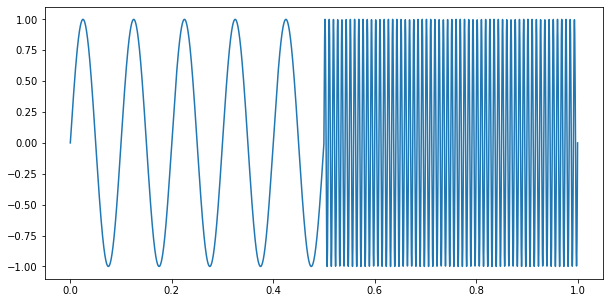

In [6]:
t = np.linspace(0, 1, 4096)
x2 = np.zeros(4096)
for i in range(0, len(t)//2):
        x2[i] = np.sin(2*np.pi*10*t[i])    
for i in range(len(t)//2, len(t)):
        x2[i] = np.sin(2*np.pi*120*t[i])
plt.figure(figsize = (10, 5))
plt.plot(t, x2)

Оценка его спектра:

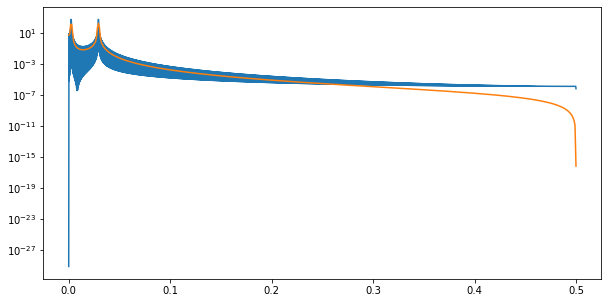

In [7]:
pd2, pdden2 = signal.periodogram(x2)
pdw2, pddenw2 = signal.welch(x2, nperseg = 1024)
plt.figure(figsize = (10, 5))
plt.semilogy(pd2, pdden2)
plt.semilogy(pdw2, pddenw2)

Спектры двух сигналов:

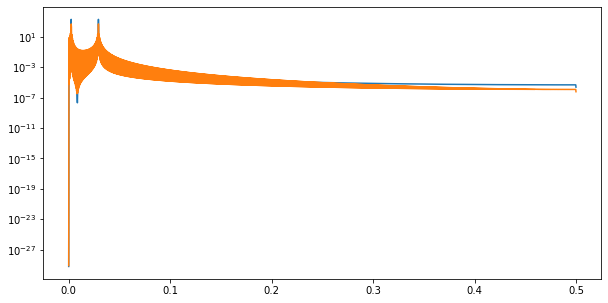

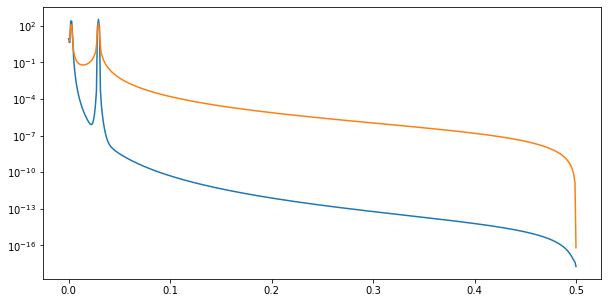

In [9]:
plt.figure(figsize = (10, 5))
plt.semilogy(pd1, pdden1)
plt.semilogy(pd2, pdden2)
plt.figure(figsize = (10, 5))
plt.semilogy(pdw1, pddenw1)
plt.semilogy(pdw2, pddenw2)

Частота дискретизации заданного ряда:

In [10]:
fs = 1/(t[1]-t[0])#fs = 1/dt = N/T

Спектрограмма для суммы двух периодик:

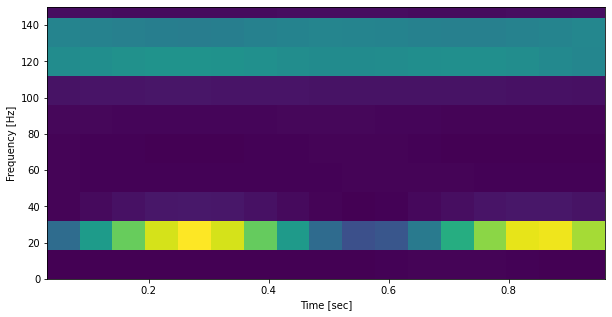

In [12]:
f, tx, Sxx= signal.spectrogram(x1, fs) 
plt.figure(figsize= (10, 5))
plt.pcolormesh(tx, f, Sxx) 
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) 
plt.xlabel('Time [sec]')
plt.show()

Изменяем параметры сегментов для более точного результата:

(0.0, 150.0)

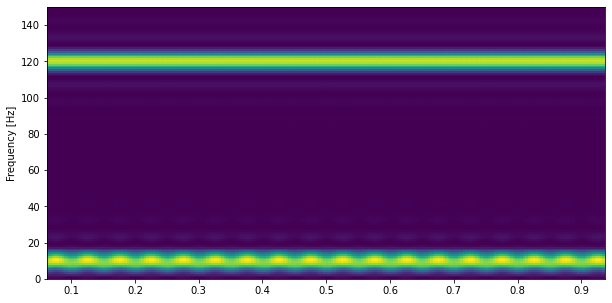

In [14]:
f, tx, Sxx= signal.spectrogram(x1, fs, nperseg= 512, noverlap= 496, nfft=4096)
plt.figure(figsize= (10, 5))
plt.pcolormesh(tx, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) 

Строим спектрограмму второго ряда x2:

(0.0, 150.0)

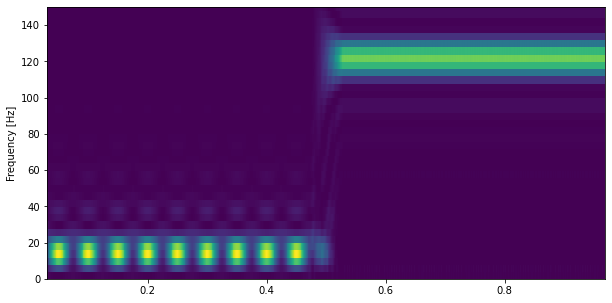

In [22]:
f, tx, Sxx= signal.spectrogram(x2, fs, nperseg= 256, noverlap= 250, nfft=1024)
plt.figure(figsize= (10, 5))
plt.pcolormesh(tx, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 150) 

В данном случае наблюдается зависимость частоты от времени (изменение отображается в значении 0.5 (примерно), что видно на графике периодического сигнала x2).

Создаем временной ряд с ЛЧМ в диапазоне от 50 до 150 Гц:

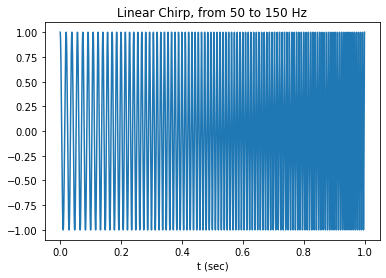

In [23]:
tx= np.linspace(0, 1, 8192) # временной отрезок от 0 до 1 сек
w = signal.chirp(tx, f0=50, f1=150, t1=1, method='linear') # от 50 до 150 Гц за 1 секунду, ЛЧМ
plt.plot(tx, w)
plt.title("Linear Chirp, from 50 to 150 Hz")
plt.xlabel('t (sec)')
plt.show()

Частота дискретизации данного ряда:

In [24]:
fs = 1/(tx[1]-tx[0])#fs = 1/dt = N/T

Строим спектрограмму:

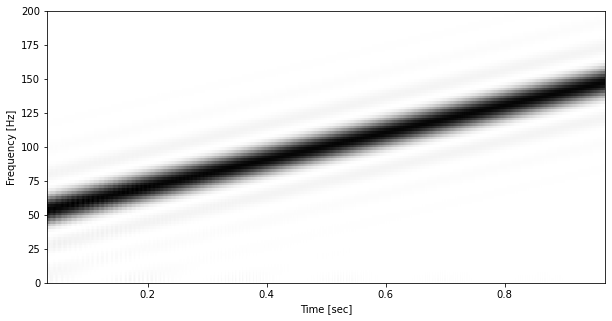

In [25]:
f, t, Sxx = signal.spectrogram(w, fs, nperseg = 512, noverlap = 496, nfft=4096)# длина каждого сегмента = 512, число пересекающихся точек между сегментами = 496, длина FFT= 4096
plt.figure(figsize= (10, 5))
plt.pcolormesh(t, f, Sxx, cmap='gray_r') 
plt.ylabel('Frequency [Hz]')
plt.ylim(0, 200)
plt.xlabel('Time [sec]')
plt.show()

Строим спетрограмму с использование преобразования Гильберта:

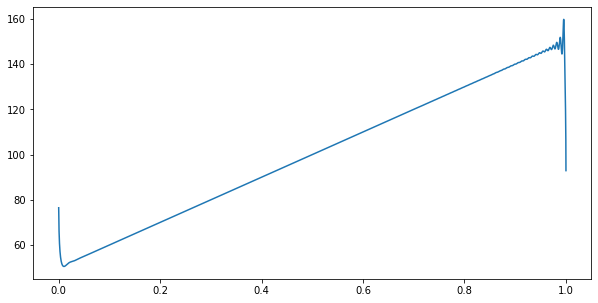

In [26]:
analytic_signal = signal.hilbert(w) # аналитическийсигнал
instantaneous_phase = np.unwrap(np.angle(analytic_signal))# мгновенная фаза в развернутом непрерывном виде
instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)# мгновенная частота как производная от фазы, приведенная в Гц
plt.figure(figsize= (10, 5))# из-за численного расчета производной массив мгновенной частоты будет меньше массива времени на одну точку:
plt.plot(tx[1:], instantaneous_frequency) 
plt.show()

Для выполнения следующих пунктов создадим функцию:

In [27]:
def Gilbert (y, ty):
    analytic_signal = signal.hilbert(y) # аналитическийсигнал
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))# мгновенная фаза в развернутом непрерывном виде
    instantaneous_frequency = (np.diff(instantaneous_phase) / (2.0*np.pi) * fs)# мгновенная частота как производная от фазы, приведенная в Гц
    plt.figure(figsize= (10, 5))# из-за численного расчета производной массив мгновенной частоты будет меньше массива времени на одну точку:
    plt.plot(ty[1:], instantaneous_frequency) 
    plt.show()   

### ЛЧМ в большем диапазоне

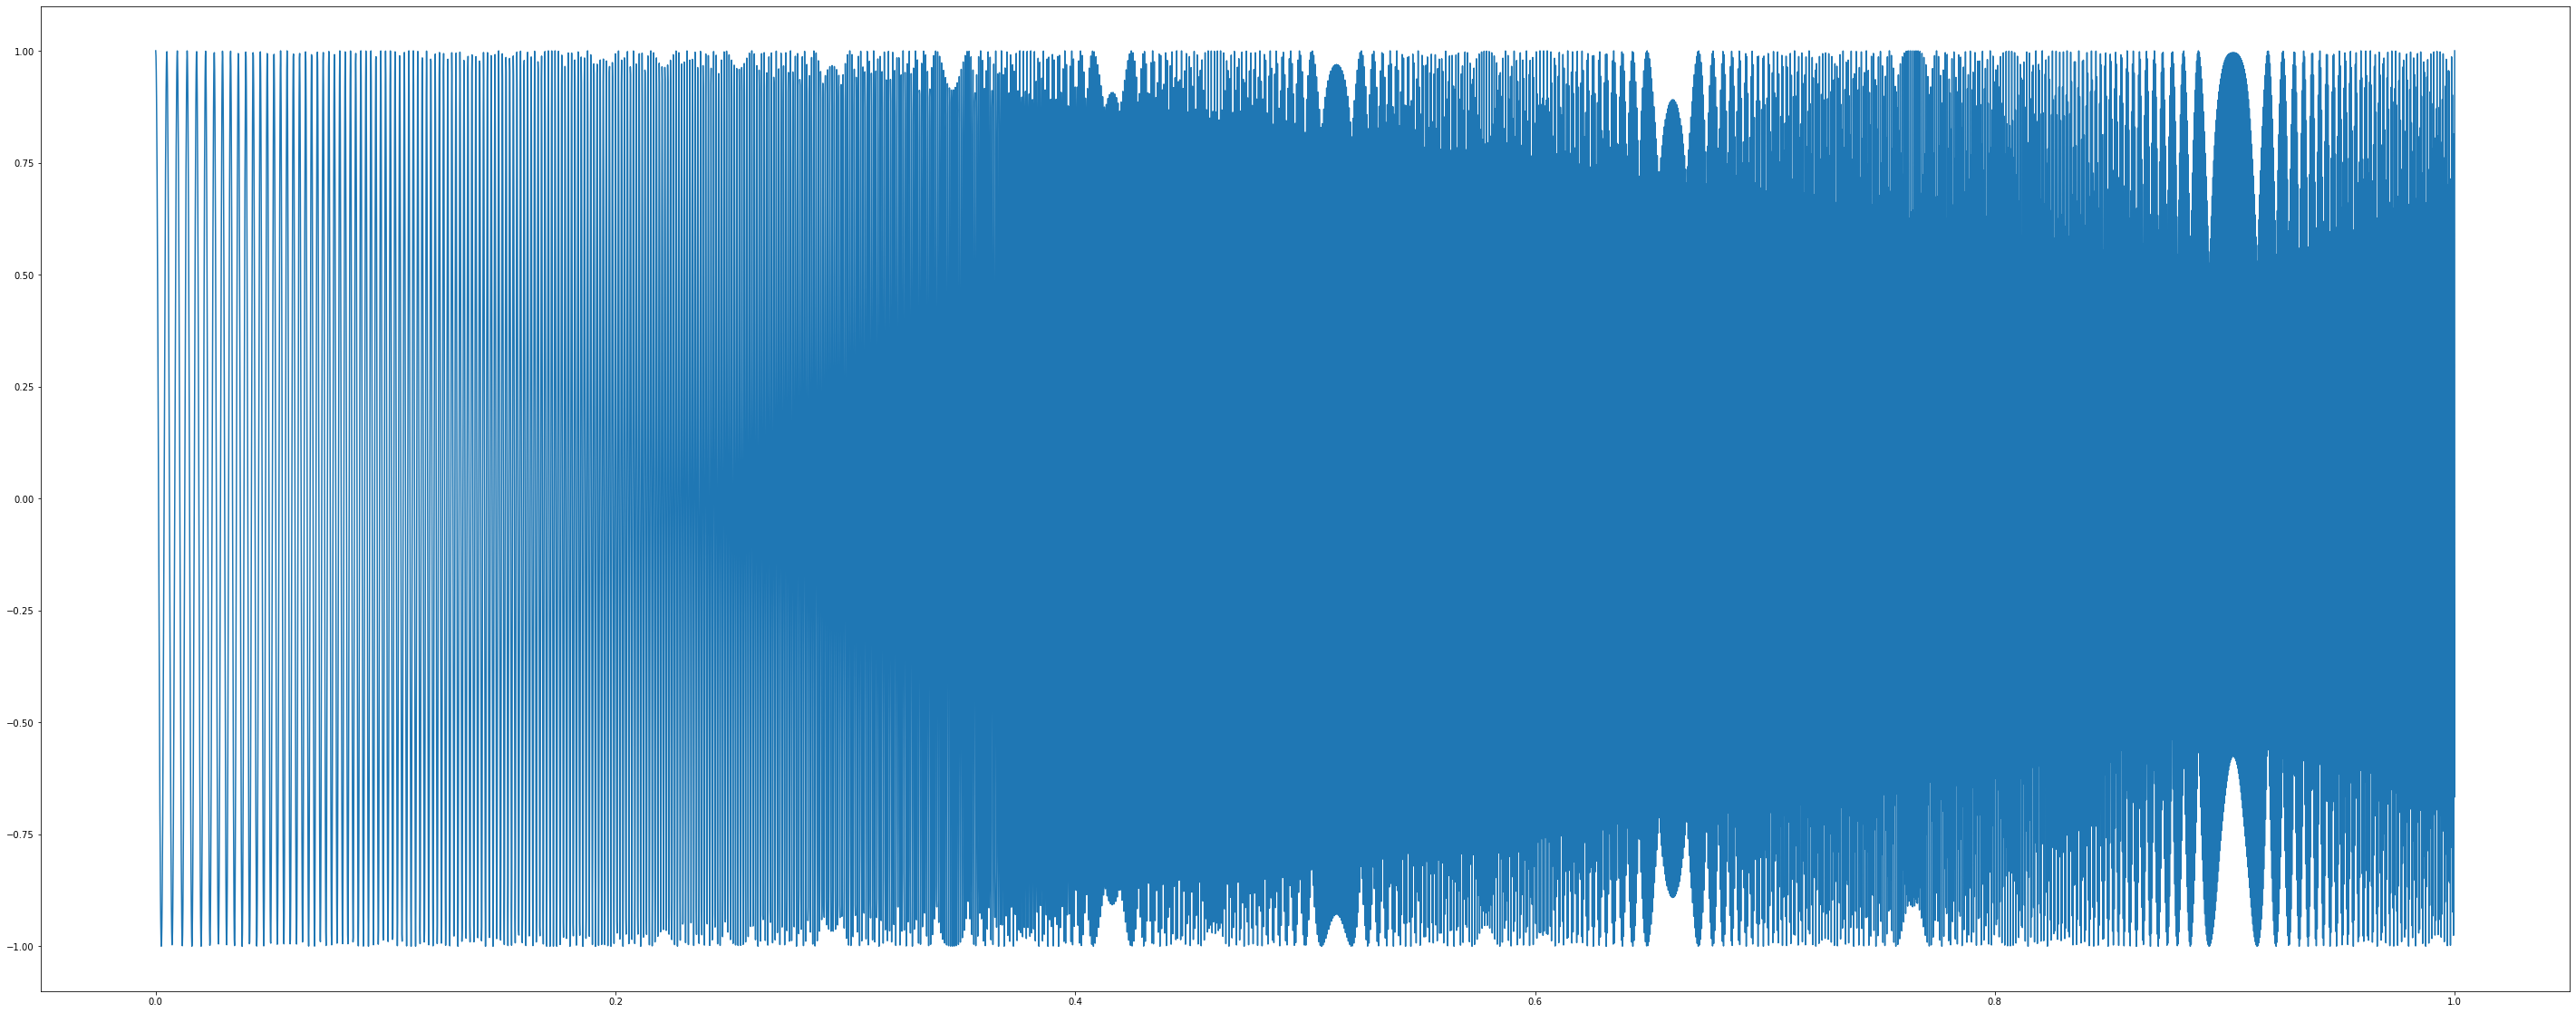

In [59]:
tx= np.linspace(0, 1, 8192) # ЛЧМ в большем диапазоне
w = signal.chirp(tx, f0=200, f1=3000, t1=1, method='linear')
plt.figure(figsize = (50, 20))
plt.plot(tx, w)

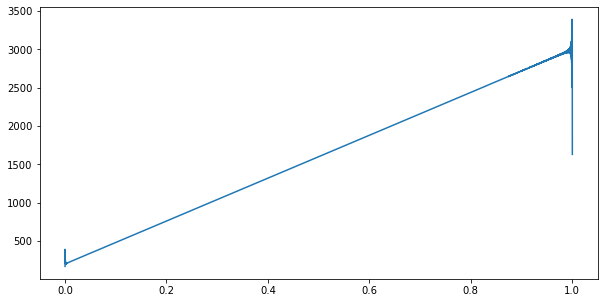

In [38]:
Gilbert (w, tx)

Линейная прямая зависимость частоты отвремени.

### Ряд с квадратичной частотной модуляцией:

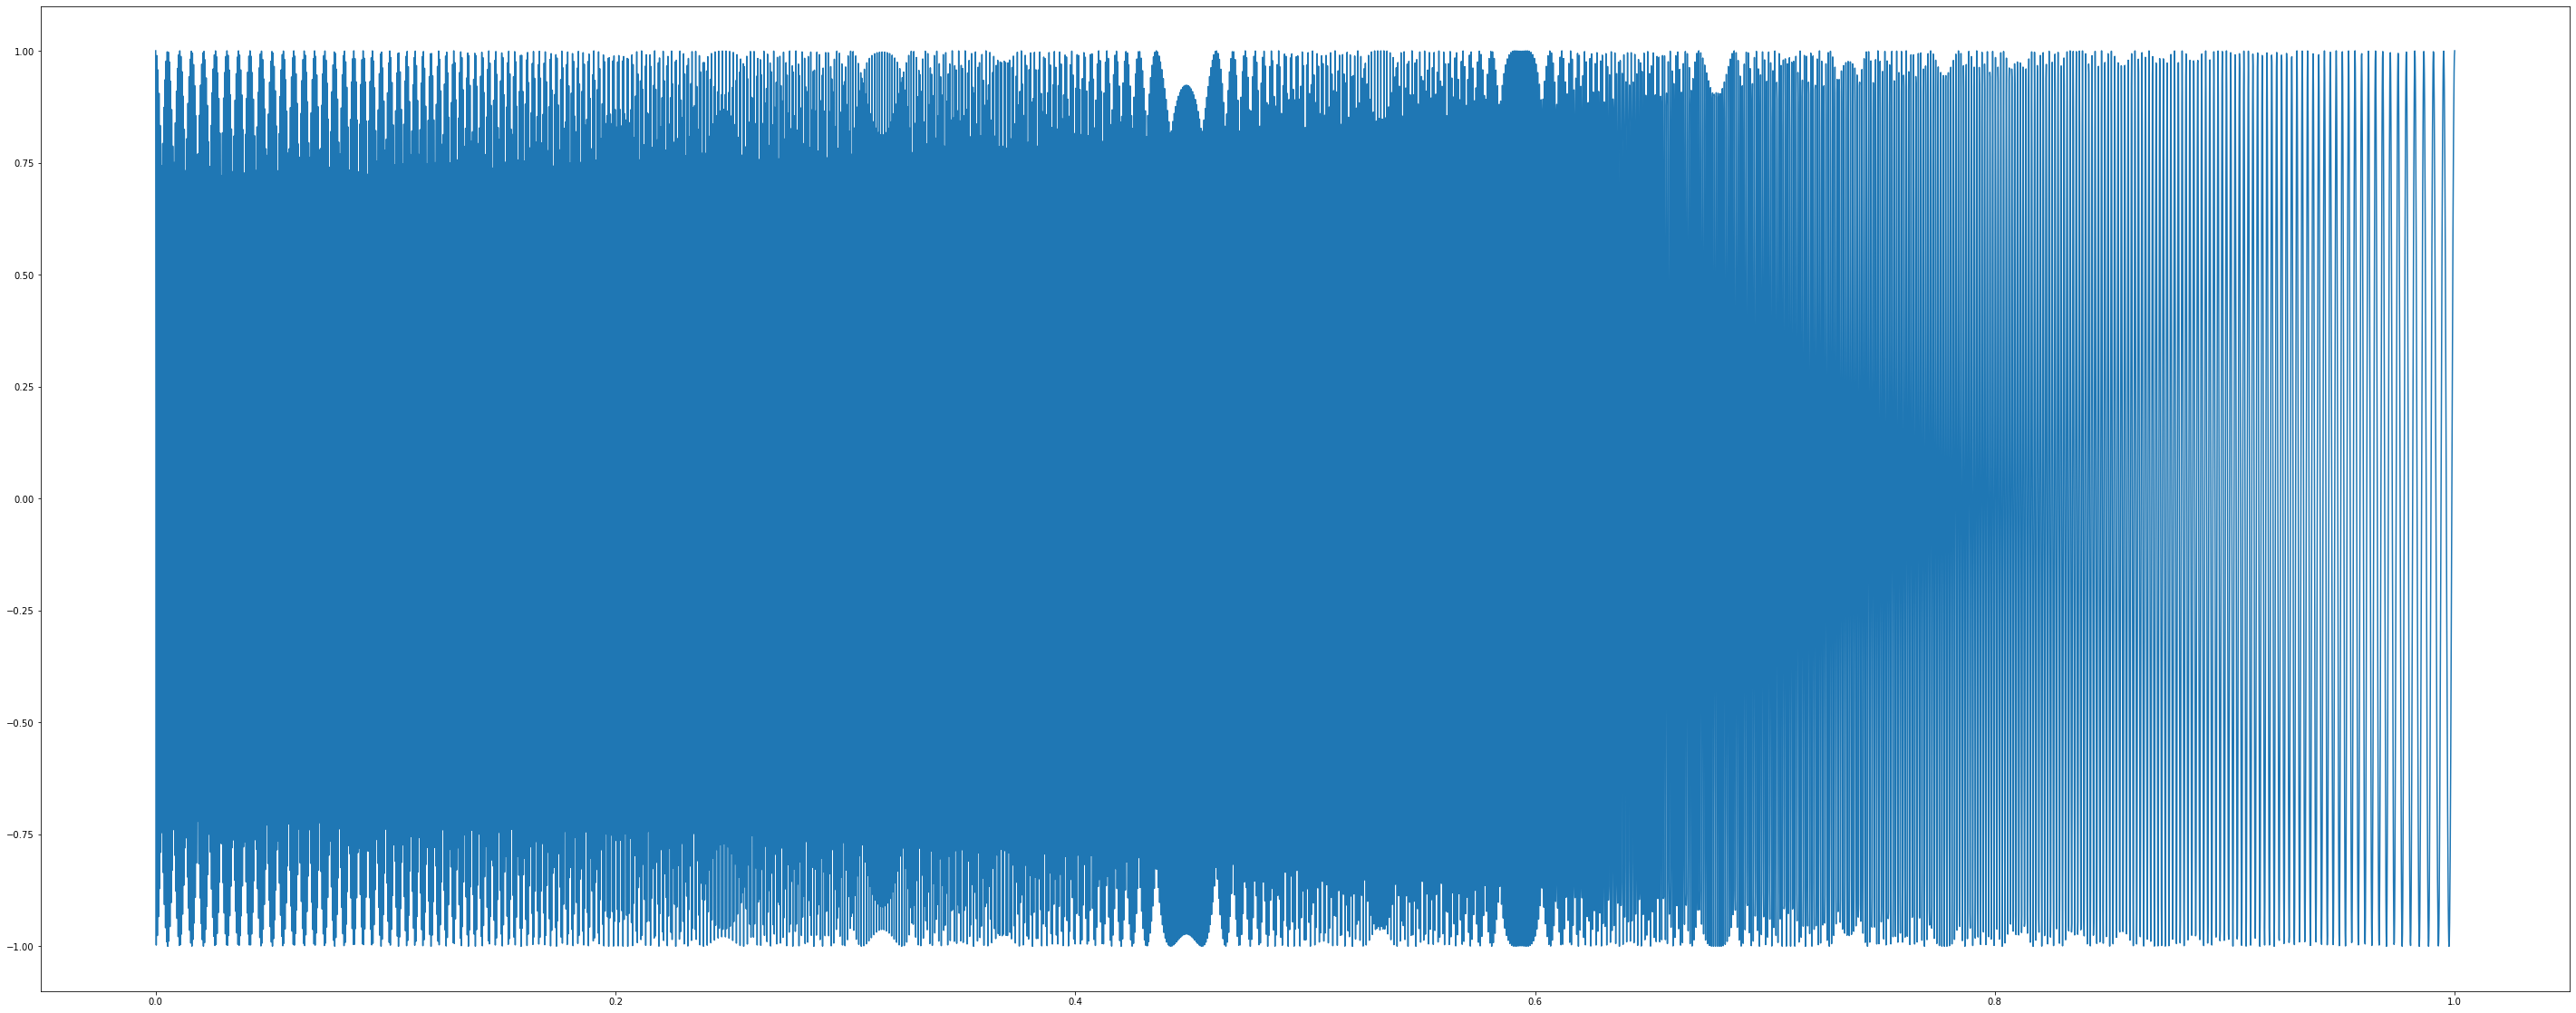

In [60]:
tx = np.linspace(0, 1, 8192)
w = signal.chirp(tx, f0=2000, f1=200, t1=1, method='quadratic')
plt.figure(figsize = (50, 20))
plt.plot(tx, w)

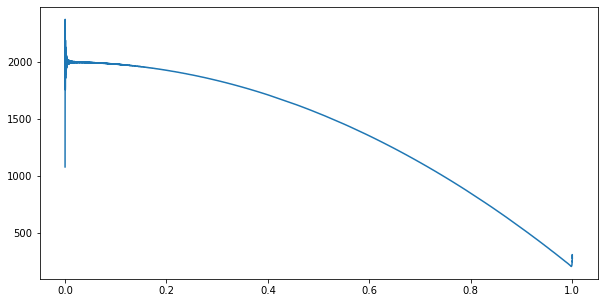

In [41]:
Gilbert (w, tx)

Обратная квадратичная зависимость частоты от веремни.

### Ряд с инверсной квадратичной частотной модуляцией:

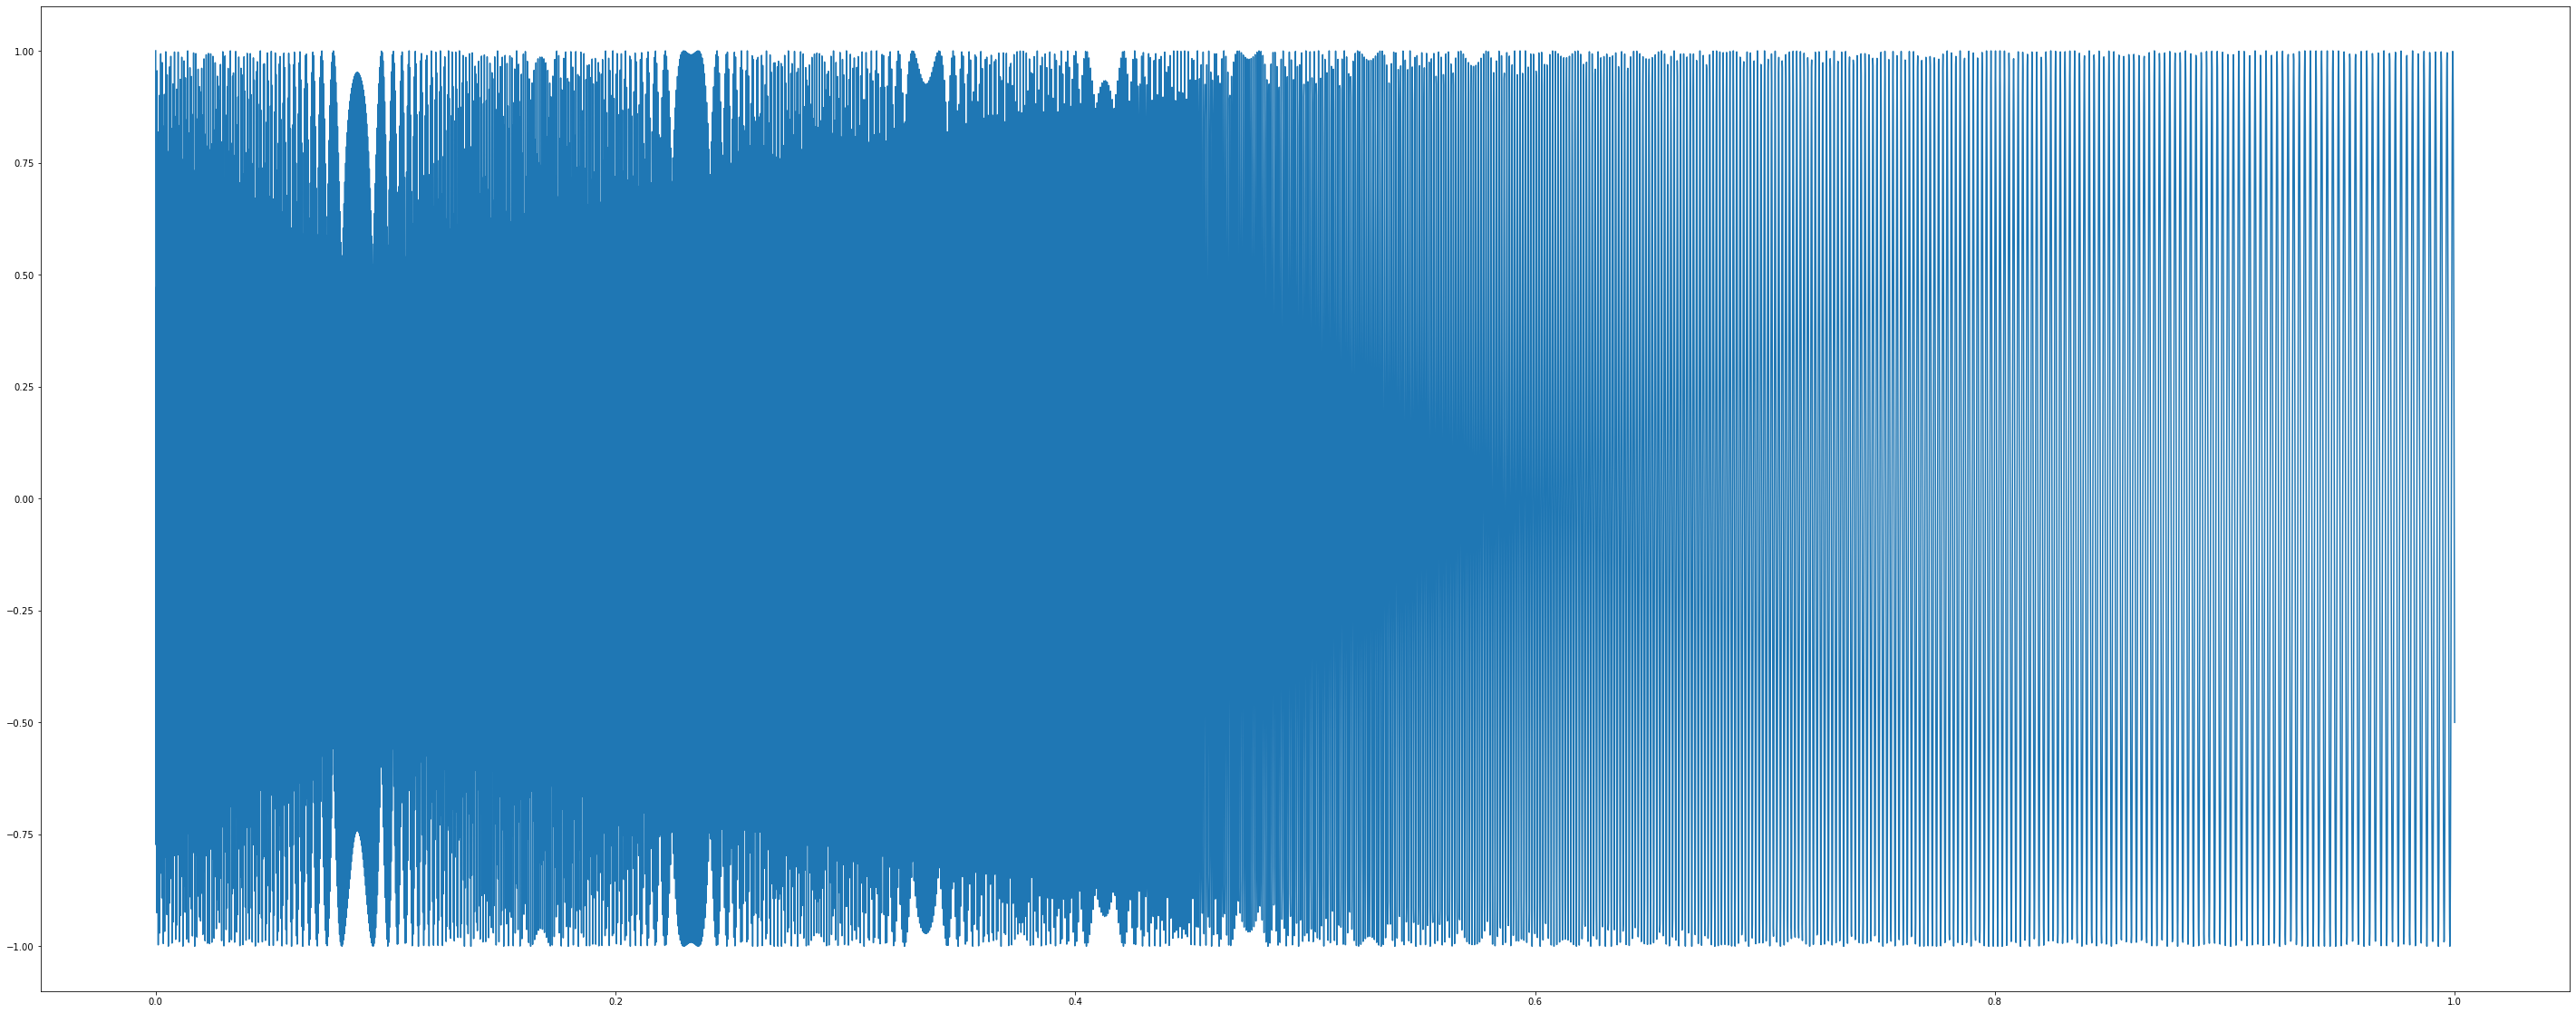

In [61]:
tx = np.linspace(0, 1, 8192)
w = signal.chirp(tx, f0=3200, f1=400, t1=1, method='quadratic', vertex_zero=False)
plt.figure(figsize = (50, 20))
plt.plot(tx, w)

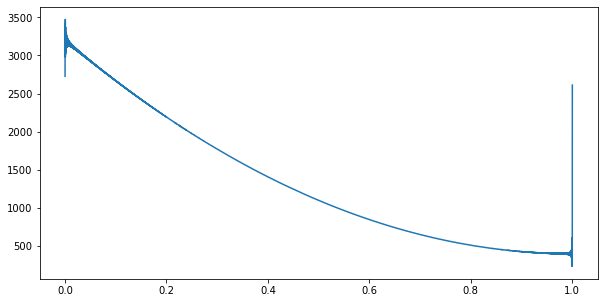

In [62]:
Gilbert (w, tx)

### Ряд с логарифмической частотной модуляцией: 

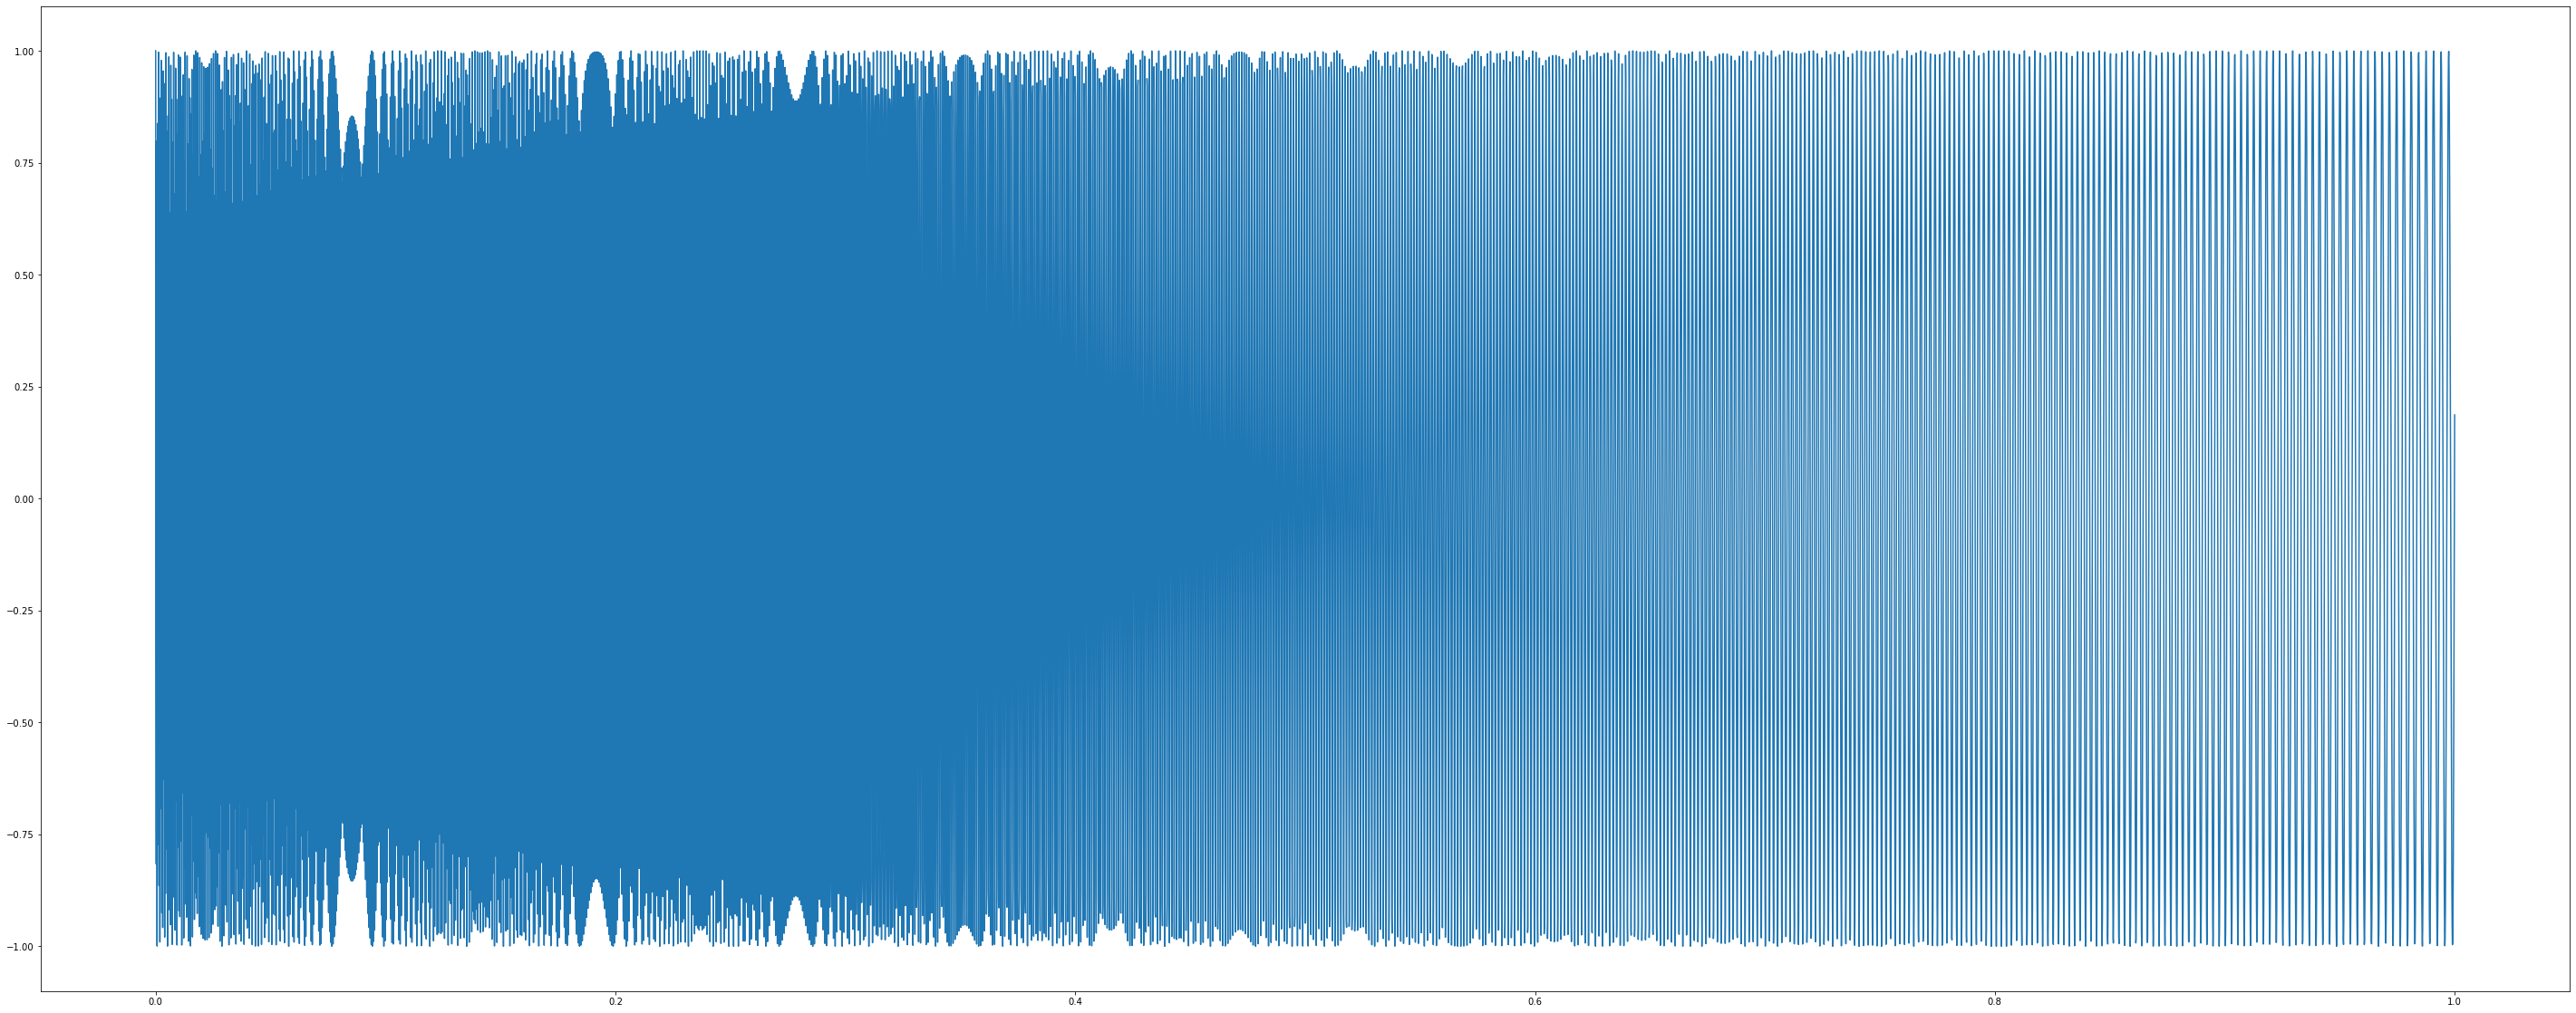

In [63]:
tx = np.linspace(0, 1, 8192)
w = signal.chirp(tx, f0=2450, f1=300, t1=1, method='logarithmic')
plt.figure(figsize = (50, 20))
plt.plot(tx, w)

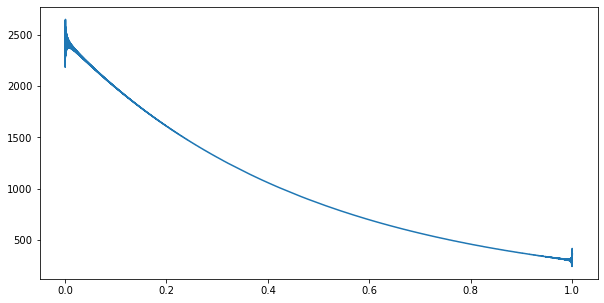

In [64]:
Gilbert (w, tx)

### Ряд с гиперболической частотной модуляцией:

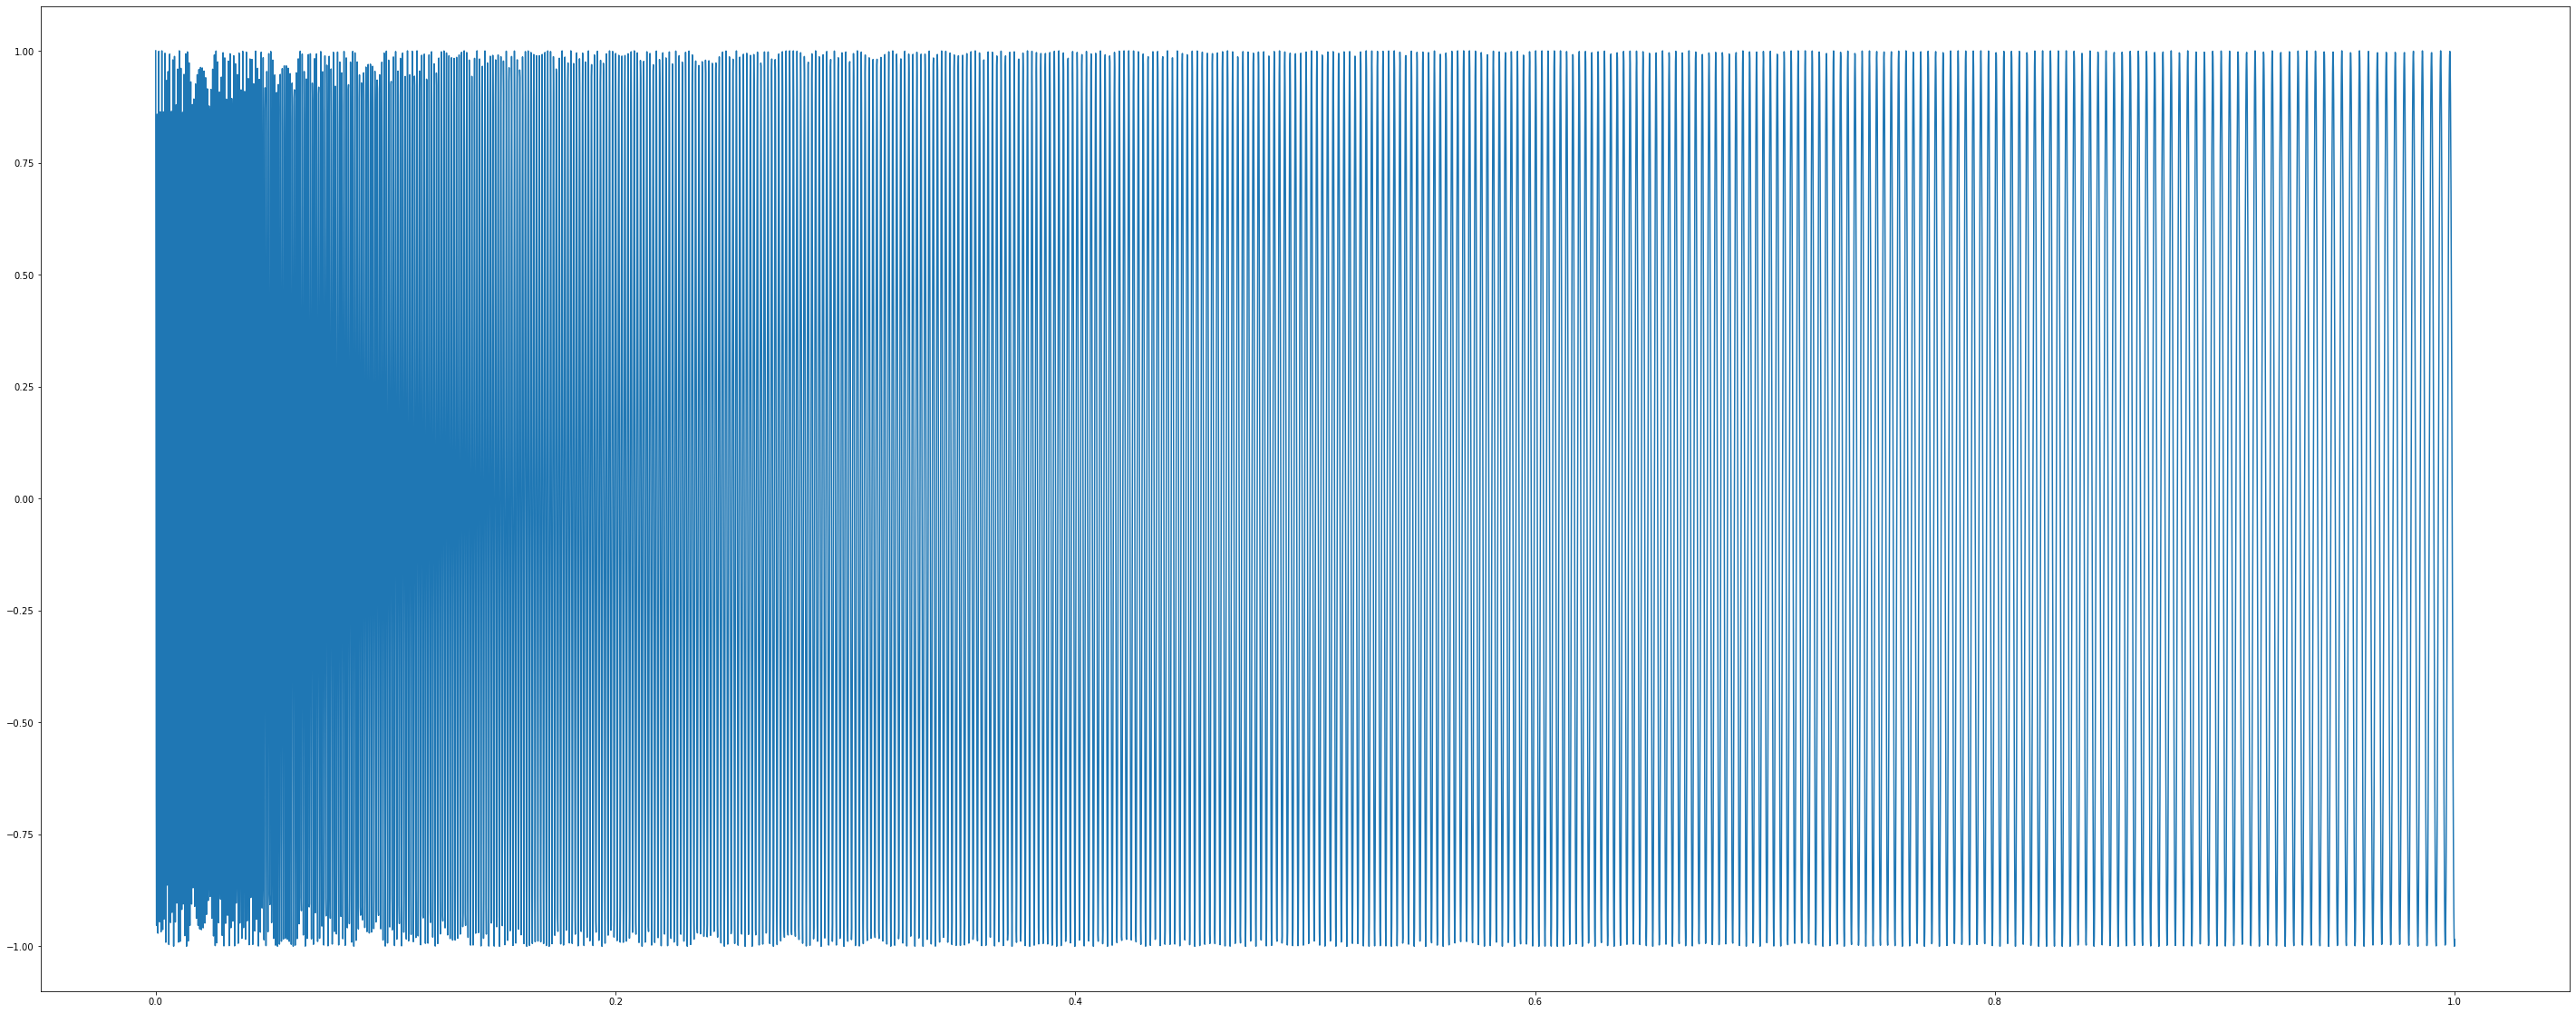

In [66]:
tx = np.linspace(0, 1, 8192)
w = signal.chirp(tx, f0=1500, f1=250, t1=1, method='hyperbolic')
plt.figure(figsize = (50, 20))
plt.plot(tx, w)

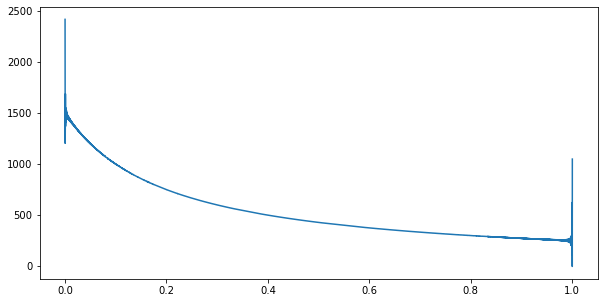

In [67]:
Gilbert (w, tx)

### Ряд с полиномиальной частотной модуляцией:

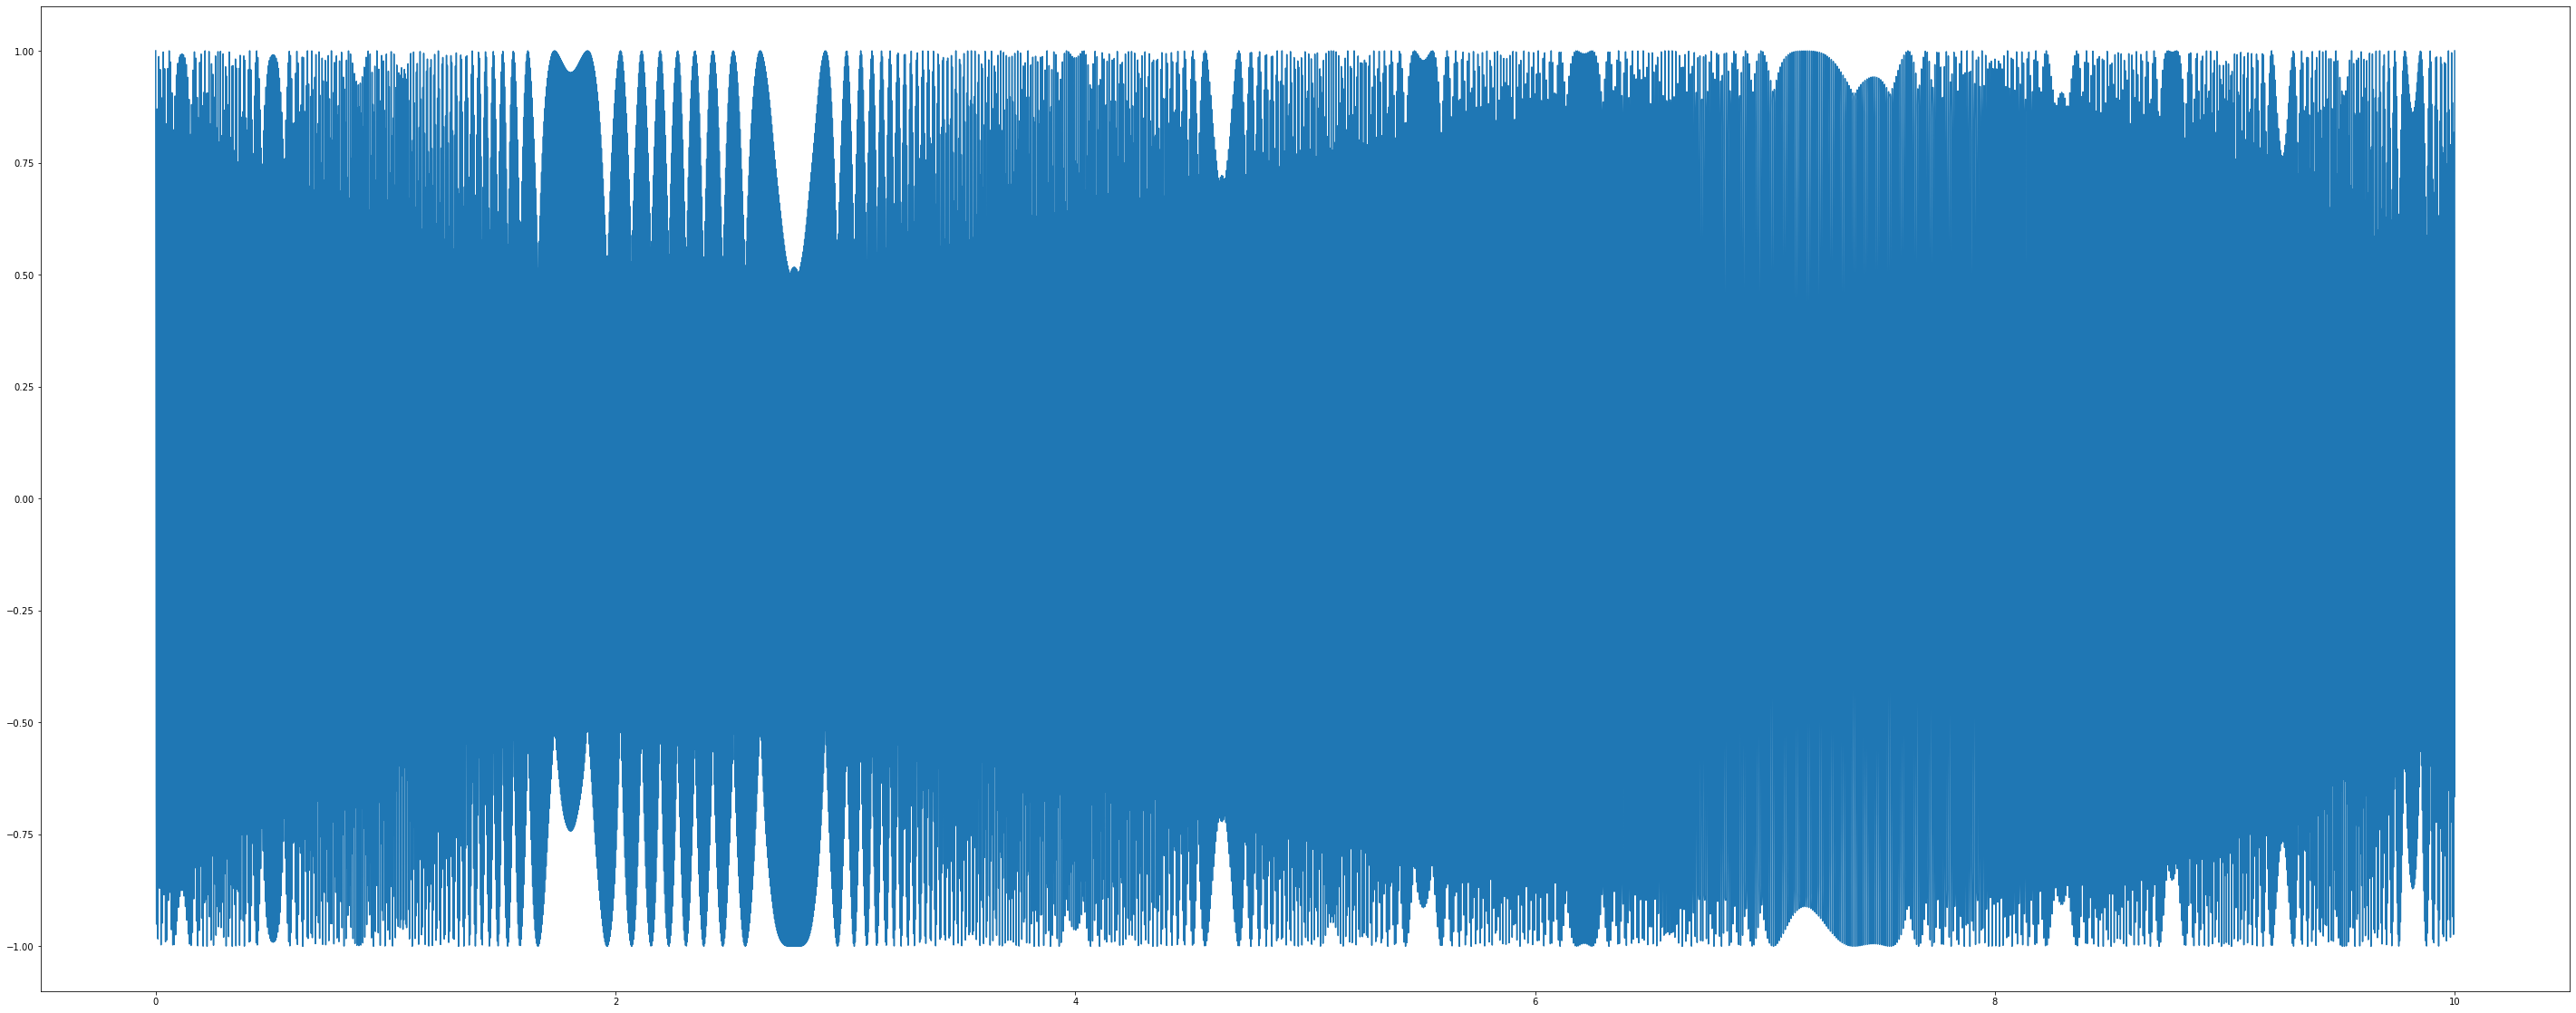

In [69]:
tx = np.linspace(0, 10, 8192)
p = np.poly1d([2.5, -36.0, 125.0, 150.0])
w = signal.sweep_poly(tx, p)
plt.figure(figsize = (50, 20))
plt.plot(tx, w)

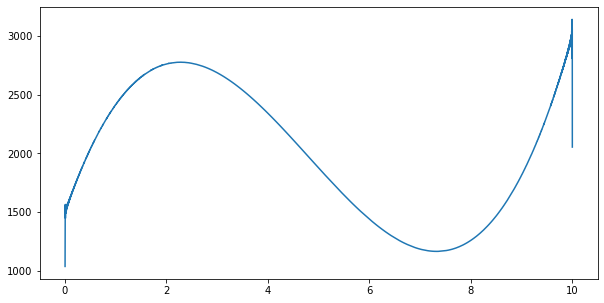

In [70]:
Gilbert (w, tx)

### Ряд с частотной модуляцией другим гармоническим сигналом:

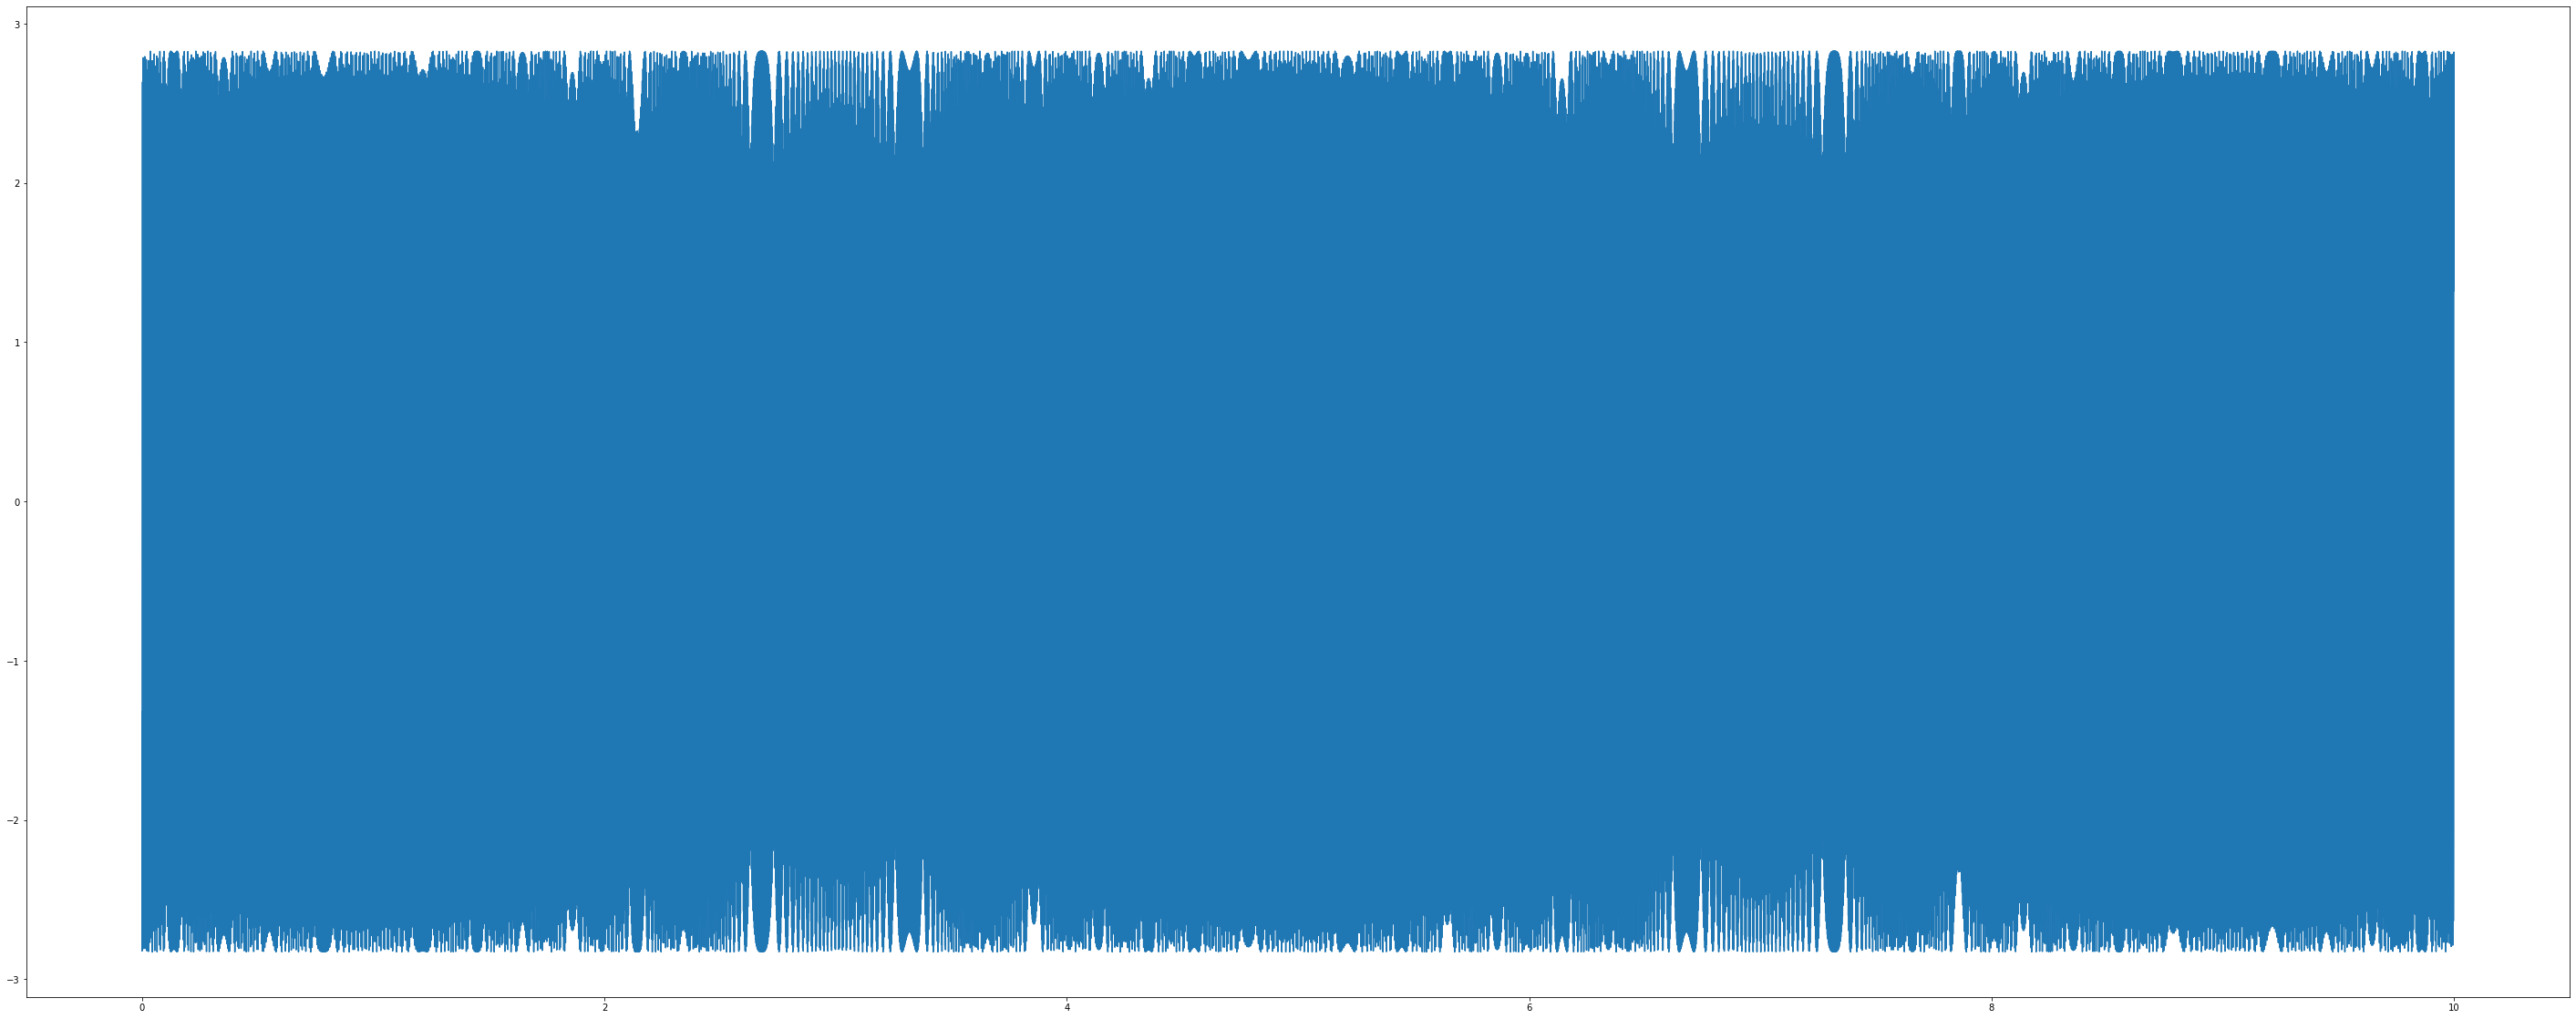

In [72]:
tx = np.linspace(0, 10, 2*8192)
mod = 500*np.cos(2*np.pi*0.25*tx)
w = 2 * np.sqrt(2) * np.sin(2*np.pi*300*tx + mod)
plt.figure(figsize = (50, 20))
plt.plot(tx, w)

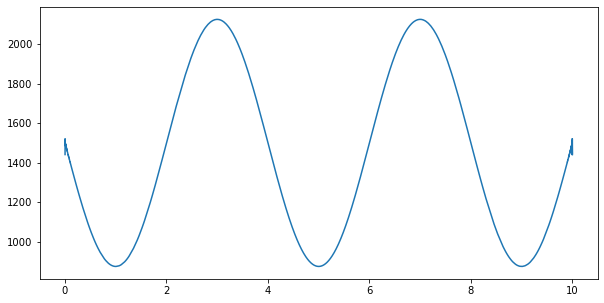

In [73]:
Gilbert (w, tx)

### Временной  рядиз 4 периодик без  шума

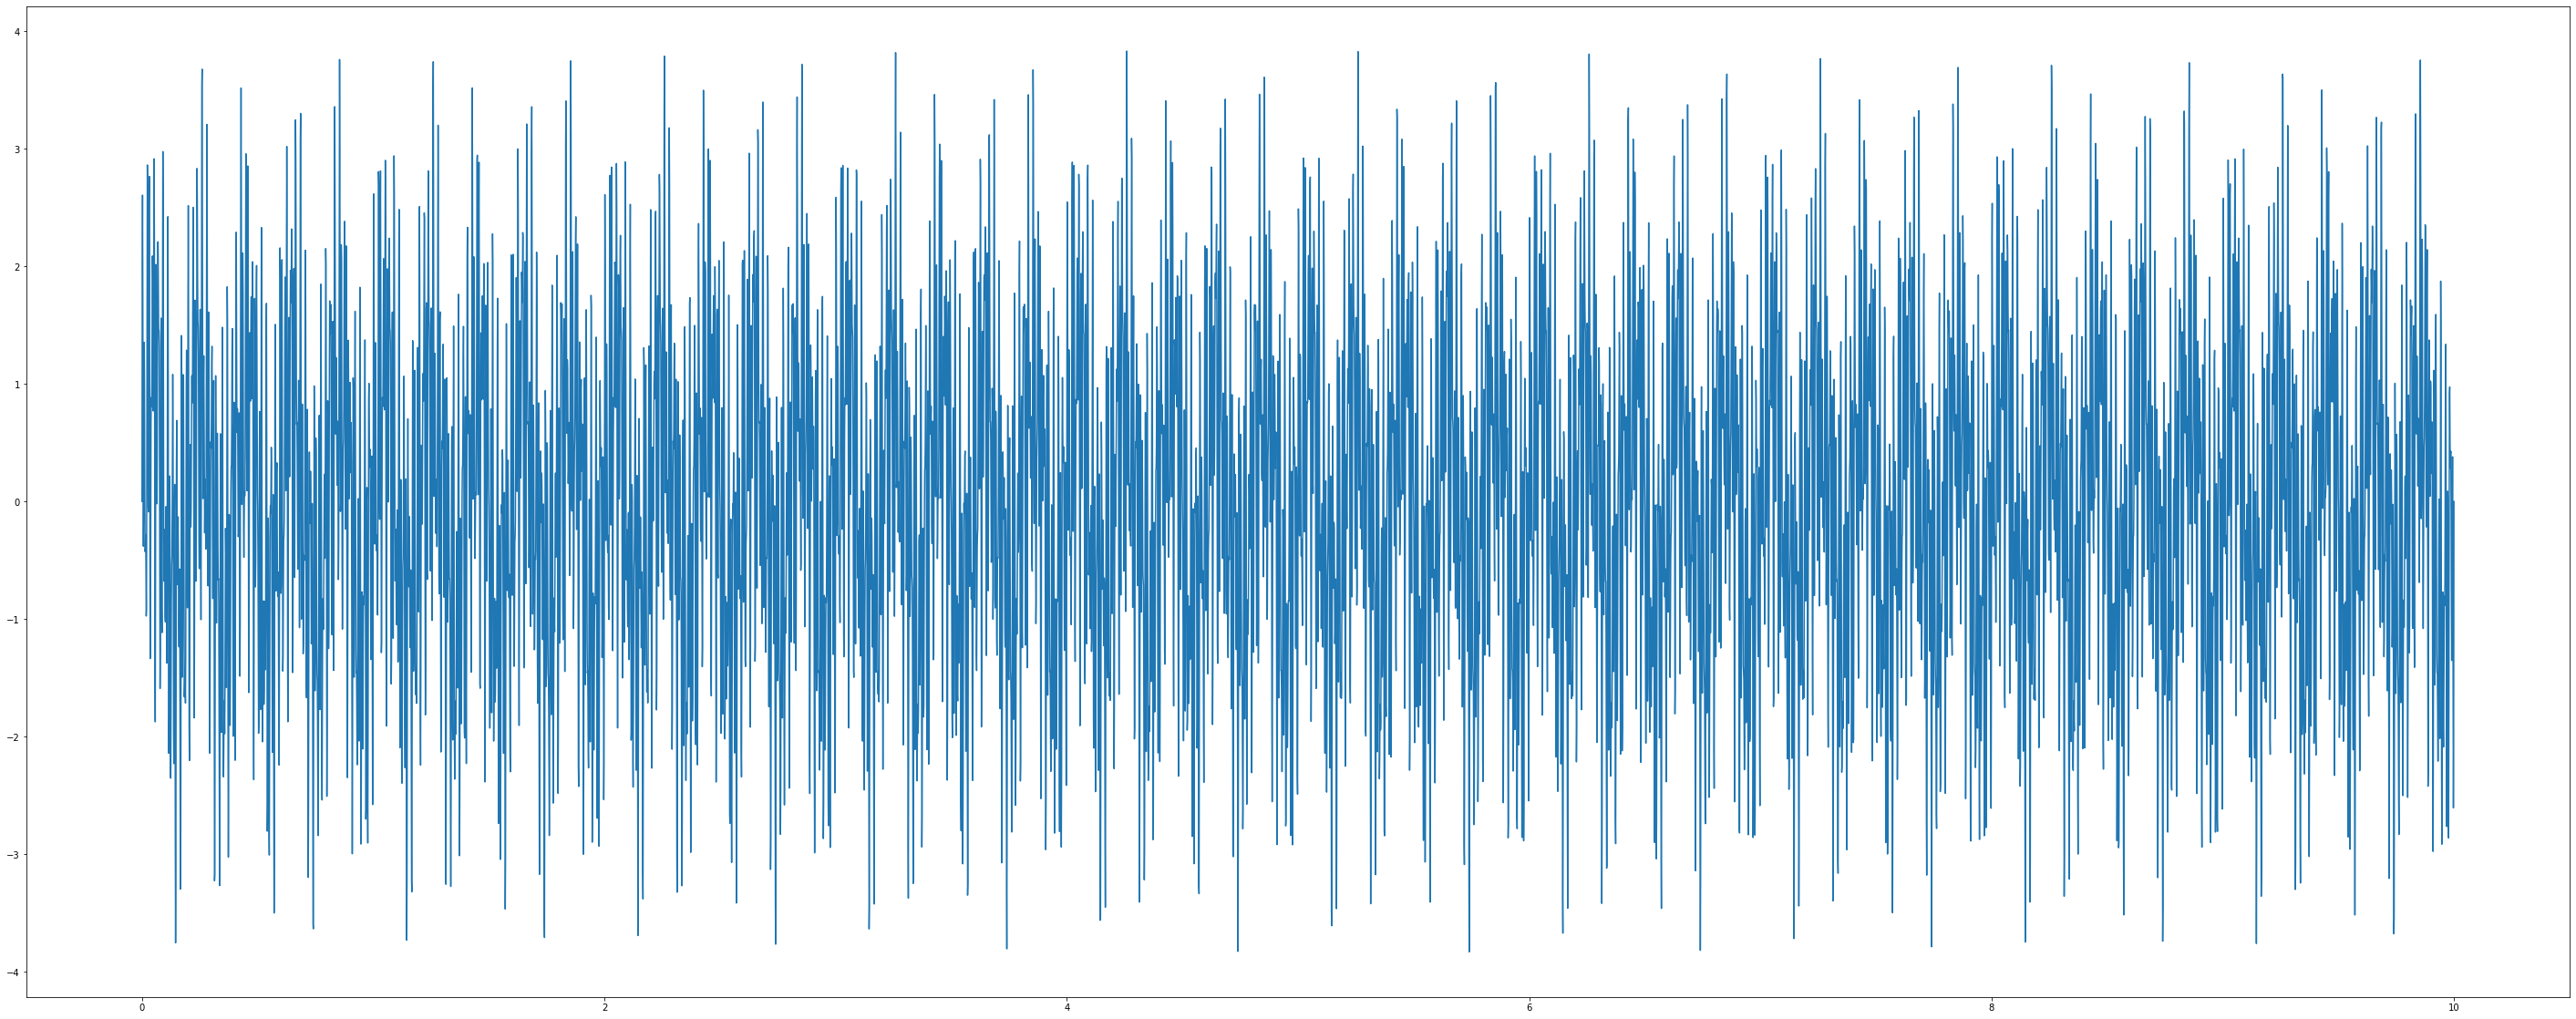

In [81]:
tx = np.linspace(0, 10, 8192)
w = np.sin(2*np.pi*5*tx) + np.sin(2*np.pi*47*tx) + np.sin(2*np.pi*101*tx) + np.sin(2*np.pi*136*tx)
plt.figure(figsize = (50, 20))
plt.plot(tx, w)

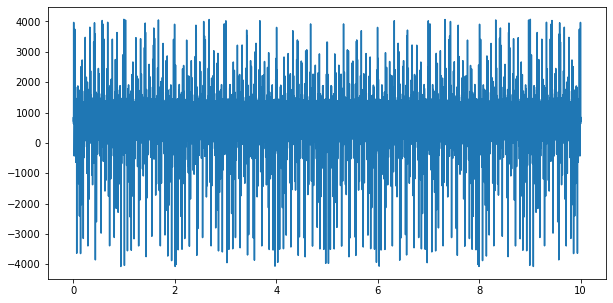

In [82]:
Gilbert (w, tx)

Создаем временной ряд, как частную выборку из нормального распределения:

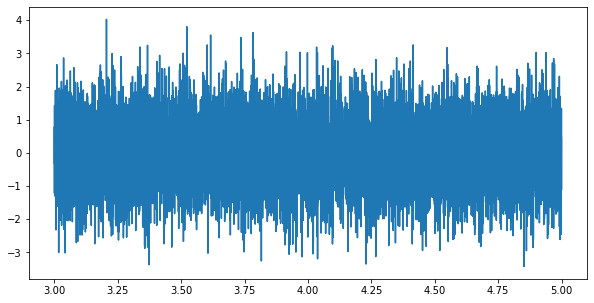

In [83]:
x = rand.randn(10000)
t = np.linspace(3, 5, num = 10000)
plt.figure(figsize = (10, 5))
plt.plot(t, x)
plt.show()

Оценка ВР на стационарность:

In [84]:
tsa.kpss(x)

C:\Users\Морозова Маргарита\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.1529595428709752,
 0.1,
 3,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Значение KPSS-test приюлижено к 0, следовательно можно принять гипотезу о том, что ряд является стационарным.

Значение p-value больше 0.5, что точно подтвержает 0 гипотезу.
Ряд стационарен.

Внесем неявную нестационарность в ряд:

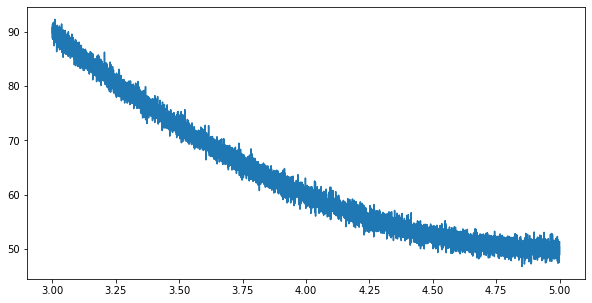

In [85]:
xv=x+(10*t**2-100*t+300)
plt.figure(figsize = (10, 5))
plt.plot(t, xv)
plt.show()

In [87]:
tsa.kpss(xv)

C:\Users\Морозова Маргарита\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


(15.97402775221925,
 0.01,
 59,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

Значение KPSS-test значительно больше 0, следовательно отвергается 0 гипотеза.
Исследуем более точный показатель p-value.
Значение p-value явно меньше 0.5, что точно опровергает 0 гипотезу. Ряд нестационарен.

Сравнение по критерию Фишера:

In [91]:
stats.f_oneway(x[x.size // 2:], x[:x.size // 2])

F_onewayResult(statistic=0.79445923861603, pvalue=0.3727765957051339)

In [92]:
stats.f_oneway(xv[xv.size // 2:], xv[:xv.size // 2])

F_onewayResult(statistic=23141.19368684252, pvalue=0.0)

В исходном ряде отсутствуют статистически значимые различия частоты (дисперсии равны).
В модифицированном ряде можно сделать вывод о наличии статистически значимых различий частоты (дисперсии не равны).

Сравнение по критерию Стьюдента:

In [93]:
stats.ttest_ind(x[x.size // 2:], x[:x.size // 2])

Ttest_indResult(statistic=-0.8913244294958094, pvalue=0.3727765957058522)

In [94]:
stats.ttest_ind(xv[xv.size // 2:], xv[:xv.size // 2])

Ttest_indResult(statistic=-152.1222984537195, pvalue=0.0)

В исходном ряде отсутствуют статистически значимые различия частоты (мат.ожидания равны). В модифицированном ряде можно сделать вывод о наличии статистически значимых различий частоты (мат.ожидания не равны).